## 4d)

In [20]:
import numpy as np
r = np.random.rand()
if (0 < r <= 1/8):
    print((1, 1))
elif (1/8 < r <= 1/4):
    print((1, 2))
elif (1/4 < r <= 3/4):
    print((2, 1))
else:
    print((2, 2))

(2, 1)


## 6a)

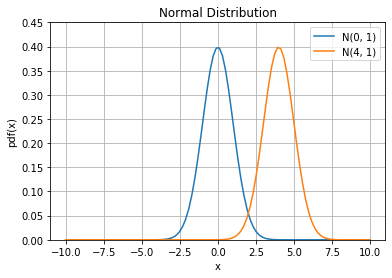

In [41]:
from scipy.stats import norm

fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
ax.plot(x, norm.pdf(x,scale=1, loc=0), label="N(0, 1)")
ax.plot(x, norm.pdf(x,scale=1, loc=4), label="N(4, 1)")
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)


## 6c)

In [59]:
p_xis2_and_yis0 = norm.pdf(x=2.0, loc=0, scale=1)
p_xis2_and_yis1 = norm.pdf(x=2.0, loc=4, scale=1)
p_yis0_given_xis2 = .75 * p_xis2_and_yis0 / (.25 * p_xis2_and_yis1 + .75 * p_xis2_and_yis0)
print(p_yis0_given_xis2)

0.7499999999999999


## 6d)

In [70]:
def MAP(x):
    p_x_and_yis0 = norm.pdf(x, loc=0, scale=1)
    p_x_and_yis1 = norm.pdf(x, loc=4, scale=1)
    p_yis0_given_x = .75 * p_x_and_yis0 / (.25 * p_x_and_yis1 + .75 * p_x_and_yis0)
    p_yis1_given_x = .25 * p_x_and_yis1 / (.25 * p_x_and_yis1 + .75 * p_x_and_yis0)
#     print(p_yis0_given_x)
#     print(p_yis1_given_x)
    if p_yis0_given_x > p_yis1_given_x:
        y_head = 0
    else:
        y_head = 1
    
    return y_head

## 6e)

In [87]:
# suppose there're 300 data sets in class Y = 1 and 100 in class Y = 0
# generating X with given distributions
X_in_Yis0 = np.random.normal(0, 1, 300)
X_in_Yis1 = np.random.normal(4, 1, 100)
err_count = 0
for x in X_in_Yis1:
    if MAP(x) != 1:
        err_count += 1
for x in X_in_Yis0:
    if MAP(x) != 0:
        err_count += 1
print("when size of data set = 400")        
print("number of misclassification = ", err_count)
print("empirical risk = ", err_count/400)

when size of data set = 400
number of misclassification =  16
empirical risk =  0.04


In [88]:
# suppose there're 3000 data sets in class Y = 1 and 1000 in class Y = 0
# generating X with given distributions
X_in_Yis0 = np.random.normal(0, 1, 3000)
X_in_Yis1 = np.random.normal(4, 1, 1000)
err_count = 0
for x in X_in_Yis1:
    if MAP(x) != 1:
        err_count += 1
for x in X_in_Yis0:
    if MAP(x) != 0:
        err_count += 1
print("when size of data set = 4000")        
print("number of misclassification = ", err_count)
print("empirical risk = ", err_count/4000)

when size of data set = 4000
number of misclassification =  66
empirical risk =  0.0165


In [90]:
# suppose there're 30000 data sets in class Y = 1 and 10000 in class Y = 0
# generating X with given distributions
X_in_Yis0 = np.random.normal(0, 1, 30000)
X_in_Yis1 = np.random.normal(4, 1, 10000)
err_count = 0
for x in X_in_Yis1:
    if MAP(x) != 1:
        err_count += 1
for x in X_in_Yis0:
    if MAP(x) != 0:
        err_count += 1
print("when size of data set = 40000")        
print("number of misclassification = ", err_count)
print("empirical risk = ", err_count/40000)

when size of data set = 40000
number of misclassification =  766
empirical risk =  0.01915


we see that the true risk approaches 0.02